# Tensorfaktorierung

In [1]:
import numpy as np
import tensorly as tl
# Vektoren definieren
u = [3, 1, 2]
v = [4, 0, 3]
w = [2, 3]
# Berechnung des dyadischen Produkts
np.outer(u,v)

array([[12,  0,  9],
       [ 4,  0,  3],
       [ 8,  0,  6]])

In [2]:
#Berechnung des äusseren Produkts
np.einsum('i,j->ij', u,v)
# i ist der index für den ersten vektor, 
# j ist derjenige des zweiten Vektores

array([[12,  0,  9],
       [ 4,  0,  3],
       [ 8,  0,  6]])

In [3]:
# wenn man teile weglässt wird das Produkt nur aufsummiert 
np.einsum('i,j->j', u,v)

array([24,  0, 18])

In [4]:
# Für Tensor erzeugen, weiteren index hinzufügen 
np.einsum('i,j,k -> kij', u,v,w)

array([[[24,  0, 18],
        [ 8,  0,  6],
        [16,  0, 12]],

       [[36,  0, 27],
        [12,  0,  9],
        [24,  0, 18]]])

In [5]:
import tensorly as tl
import numpy as np

In [6]:
# Matrix machen
A = np.zeros((2,2))
A[0,0] =2 
A[0,1] =1
A[1,0] =1 
A[1,1] =3 
B = np.zeros((2,2))
B[0,0] = 3 
B[0,1] = 3
B[1,0] = -2 
B[1,1] = 4 

In [7]:
tl.tenalg.kronecker((A, B))

array([[ 6.,  6.,  3.,  3.],
       [-4.,  8., -2.,  4.],
       [ 3.,  3.,  9.,  9.],
       [-2.,  4., -6., 12.]])

In [8]:
tl.tenalg.khatri_rao((A, B))

array([[ 6.,  3.],
       [-4.,  4.],
       [ 3.,  9.],
       [-2., 12.]])

In [9]:
# Hadamard-Produkt
A*B

array([[ 6.,  3.],
       [-2., 12.]])

## Von Fasern, Schichten und anderen Ballaststoffen…
Erzeugen eines Tensors

In [10]:
X = np.arange(24).reshape((3, 4, 2))
X = X + 1 # Zahlen liegen in [0,23] -> Zahlen liegen in [1,24]

In [11]:
X

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12],
        [13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20],
        [21, 22],
        [23, 24]]])

In [12]:
X[:,:,0]

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

In [13]:
X[:,:,1]

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16],
       [18, 20, 22, 24]])

Mode-$n$-Entfaltung $X_(0),X_(1),X_(2)$
```
tl.unfold(X, 0)
tl.unfold(X, 1)
tl.unfold(X, 2)
```

In [14]:
tl.unfold(X, 0)
#tl.unfold(X, 1)
#tl.unfold(X, 2)

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24]])

In [1]:
# Erzeugung eines Tensors mit Floats für die Faktorisierung
X = np.arange(24.).reshape((3, 4, 2))
X = X + 1 # Zahlen liegen in [0,23] -> Zahlen liegen in [1,24]
X

NameError: name 'np' is not defined

CP-Faktorisierung $$X -> [[A_1,A_2,A_3]]$$

In [16]:
from tensorly.decomposition import parafac

In [17]:
fac = parafac(X, 1) # 1 Rang-1 Tensor erstellen
fac

(weights, factors) : rank-1 CPTensor of shape (3, 4, 2) 

In [18]:
fac[0] # Gewichte, welche ignoriert werden könne (lambda)

array([1.])

In [19]:
# Vektoren der Zerlegung ausgeben 
print(fac[1][0])
print(fac[1][1])
print(fac[1][2])

[[-13.52387779]
 [-35.91842688]
 [-58.31297598]]
[[0.40132871]
 [0.4638374 ]
 [0.52634608]
 [0.58885477]]
[[-0.68487409]
 [-0.7286615 ]]


In [20]:
# Tensor aus Faktormatrizen Rekonstruieren
X_rec = tl.kruskal_to_tensor(fac)
X_rec

array([[[ 3.71716811,  3.95482521],
        [ 4.29613315,  4.57080638],
        [ 4.87509819,  5.18678754],
        [ 5.45406323,  5.80276871]],

       [[ 9.87252569, 10.50372552],
        [11.41021434, 12.13972629],
        [12.947903  , 13.77572705],
        [14.48559165, 15.41172782]],

       [[16.02788327, 17.05262583],
        [18.52429554, 19.7086462 ],
        [21.02070781, 22.36466656],
        [23.51712008, 25.02068693]]])

In [21]:
X - X_rec # Fehler einzeln anzeigen lassen

array([[[-2.71716811, -1.95482521],
        [-1.29613315, -0.57080638],
        [ 0.12490181,  0.81321246],
        [ 1.54593677,  2.19723129]],

       [[-0.87252569, -0.50372552],
        [-0.41021434, -0.13972629],
        [ 0.052097  ,  0.22427295],
        [ 0.51440835,  0.58827218]],

       [[ 0.97211673,  0.94737417],
        [ 0.47570446,  0.2913538 ],
        [-0.02070781, -0.36466656],
        [-0.51712008, -1.02068693]]])

In [22]:
tl.norm(X - X_rec)
# alle Fehlerwerte berechnen (Wurzel der Summe der quadrierten Fehler)

5.1543820512947045

In [23]:
fac = parafac(X, 2) # 2 Rang-1 Tensor erstellen
fac

(weights, factors) : rank-2 CPTensor of shape (3, 4, 2) 

In [24]:
# Vektoren der Zerlegung ausgeben 
print(fac[1][0])
print(fac[1][1])
print(fac[1][2])

[[23.18511536 -1.44611273]
 [39.20666147 -0.63193394]
 [55.22820758  0.18224485]]
[[-0.41883548  1.50367022]
 [-0.47216536  1.20589006]
 [-0.52549524  0.9081099 ]
 [-0.57882513  0.61032974]]
[[-0.70682384  2.72159815]
 [-0.74577084  2.38265134]]


In [25]:
# Tensor aus Faktormatrizen Rekonstruieren
X_rec = tl.kruskal_to_tensor(fac)
X_rec

array([[[ 0.9457372 ,  2.06097362],
        [ 2.99168086,  4.00911514],
        [ 5.03762451,  5.95725666],
        [ 7.08356817,  7.90539818]],

       [[ 9.02073614,  9.98236438],
        [11.01076793, 11.9900478 ],
        [13.00079972, 13.99773122],
        [14.99083151, 16.00541464]],

       [[17.09573508, 17.90375514],
        [19.029855  , 19.97098046],
        [20.96397493, 22.03820578],
        [22.89809485, 24.10543111]]])

In [26]:
X - X_rec # Fehler einzeln anzeigen lassen

array([[[ 0.0542628 , -0.06097362],
        [ 0.00831914, -0.00911514],
        [-0.03762451,  0.04274334],
        [-0.08356817,  0.09460182]],

       [[-0.02073614,  0.01763562],
        [-0.01076793,  0.0099522 ],
        [-0.00079972,  0.00226878],
        [ 0.00916849, -0.00541464]],

       [[-0.09573508,  0.09624486],
        [-0.029855  ,  0.02901954],
        [ 0.03602507, -0.03820578],
        [ 0.10190515, -0.10543111]]])

In [28]:
tl.norm(X - X_rec)
# alle Fehlerwerte berechnen (Wurzel der Summe der quadrierten Fehler)

0.2673668486503644

In [33]:
fac3 = parafac(X, 3) # 3 Rang-1 Tensor erstellen
fac3

(weights, factors) : rank-3 CPTensor of shape (3, 4, 2) 

In [34]:
# Tensor aus Faktormatrizen Rekonstruieren
X_rec3 = tl.kruskal_to_tensor(fac)
X_rec3

array([[[ 0.99999998,  2.00000002],
        [ 2.99999998,  4.00000002],
        [ 4.99999998,  6.00000002],
        [ 6.99999998,  8.00000002]],

       [[ 9.00000007,  9.99999993],
        [11.00000002, 11.99999998],
        [12.99999998, 14.00000002],
        [14.99999993, 16.00000007]],

       [[17.00000017, 17.99999984],
        [19.00000007, 19.99999993],
        [20.99999997, 22.00000002],
        [22.99999988, 24.00000012]]])

In [37]:
print(tl.norm(X - X_rec3)
# alle Fehlerwerte berechnen (Wurzel der Summe der quadrierten Fehler)

3.465205826165974e-07


Die Resultate sehen für jede Berechnung unterschiedlich aus, da die Faktoriesierung jeweils mit randomisierten werten startet.

Mit lena ausprobieren

In [39]:
import matplotlib.pyplot as plt

In [41]:
img = plt.imread("lena/lena.png")

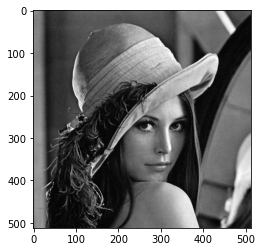

In [43]:
plt.imshow(img, cmap="gray")

In [44]:
fac = parafac(img,10)

In [45]:
img_rec = tl.kruskal_to_tensor(fac)

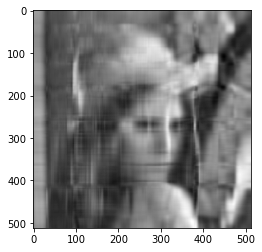

In [46]:
plt.imshow(img_rec, cmap="gray")

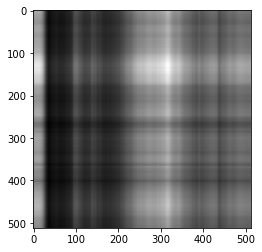

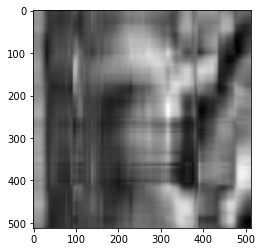

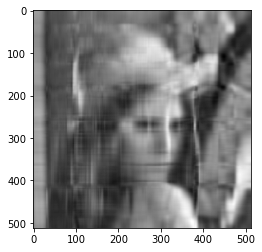

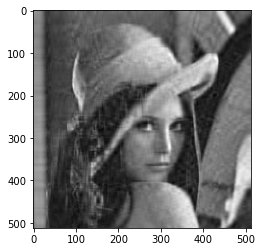

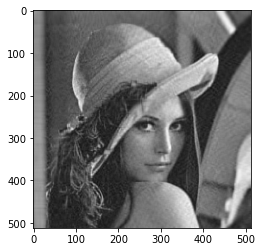

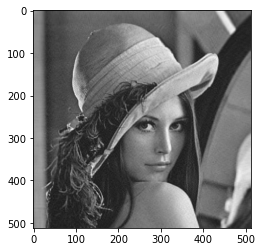

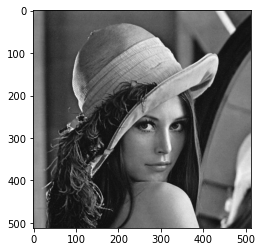

In [49]:
#Bildzerlegung in einer Schleife 
rank = [1, 5, 10, 25, 50, 100, 200]
for r in rank:
    fac = parafac(img,r)
    img_rec = tl.kruskal_to_tensor(fac)
    plt.imshow(img_rec, cmap="gray")
    plt.show()

## Analyse mehrdimensionaler Daten mit Tensorfaktorierung
![Beispieldaten](tensor_samples-1.png)

In [51]:
# Python modul aus lokalem Verzeichnis laden
from mytensor import gen_tensor_one_feature as gen1f
from mytensor import plot_uvw_one_feature as plot1f

In [61]:
# Tensor konstruieren
X = gen1f()
X.shape

(90, 100, 100)

In [63]:
w_, fac = parafac(X, 1) # Tensor mit Rang 1 Faktorieren (da wir noch nichts wissen). Gewichtung separat als w_
fac

[array([[52.72762402],
        [52.74178788],
        [52.74667881],
        [52.73333513],
        [52.73486899],
        [52.72047133],
        [52.75156951],
        [52.73742606],
        [52.73001252],
        [52.7282661 ],
        [52.72432988],
        [52.72484994],
        [52.73702233],
        [52.73005231],
        [52.74890927],
        [52.73814218],
        [52.72713877],
        [52.74782658],
        [52.74845623],
        [52.73819165],
        [52.72361133],
        [52.74021832],
        [52.73978144],
        [52.72219343],
        [52.74880884],
        [52.7428701 ],
        [52.73690502],
        [52.74745134],
        [52.72981781],
        [52.73260544],
        [57.24792739],
        [57.24957166],
        [57.23638893],
        [57.24349859],
        [57.25166924],
        [57.24479498],
        [57.24782834],
        [57.24014405],
        [57.24137032],
        [57.25941738],
        [57.24624549],
        [57.25085957],
        [57.25517076],
        [57

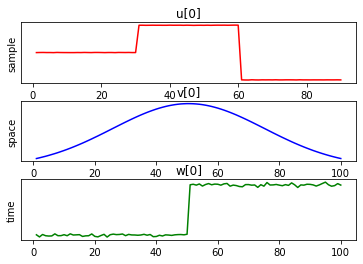

In [66]:
# Alle drei Vektoren visualisieren 
plot1f(fac) # einzelne Werte plotten

Space = vorherschende Form über alle Samples 
über die Zeit ändert sich die ersten 50 Zeitschritte nicht und in den letzten auch nichts 
samples: Erstes sample gleich. Beim zweiten Sample geht es hoch, beim dritten Sample wieder runter 

## Tucker-faktorisierung
am beispiel der Gesichtserkennung


```
G, factors = tucker(X, (rank1, rank2, ..., rankN)) 
# Ranks müssen gewählt werden, zb. anhand der Originaldimensionen, aber nicht grösser

# tensor rekonsturieren 
X_rec = tl.tucker_to_tensor((G, factors))
tl.norm(X – X_rec)
```

In [79]:
from tensorly.decomposition import tucker

In [80]:
# Olivetti-Datensart (40 Personen mit jeweils 10 Gesischtsausdrücken )
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()

In [81]:
data # Die bilder wurden Klassifiziert in dem Sie den Personen zugeordnet sind 

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

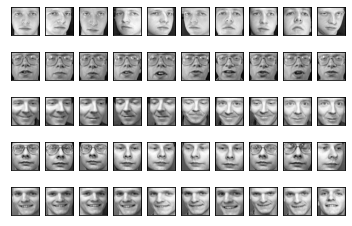

In [78]:
from mytensor import plot_faces
plot_faces(data.images, 5,10, False) # False = nicht durcchpermutieren. Also alle Personen in der gleichen Reihenfolge

**Aufgabe: können die Bilder so aufbereitet werden, damit wir diese besserr unterscheiden oder zuornden können -> Biometrische Merkmale rausfiltern/normalisieren**
- Die wesentlichen Merkmale sollen nach Tucker im Kerntensor stecken 


In [83]:
G, factors = tucker(data.images, (16,16,16)) 

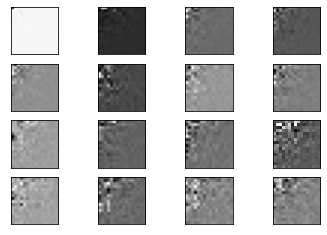

In [90]:
# Darstellen 
plot_faces(G,4,4,False) # Bilder mit der neuen Gewichtung ansehen Kerntensor 
# Dies sind die gewichteten Biometrischen Merkmale aller Personen. Der rest steckt in den Faktormatrizen 

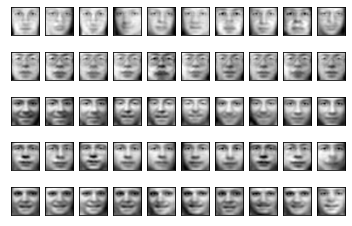

In [94]:
# Das ganze visuell Rekapitulieren (Informationsverlust darstellen)
# Dafür den Tensor rekonstruieren 
X_rec = tl.tucker_to_tensor((G,factors))
plot_faces(X_rec, 5,10, False)

Resultat: DIe Bilder wurden normalisiert (Brillen weg, einheitlichere Ausrichtung der Gesichter)

In [98]:
# Rekunstruktion der Bilder mit hilfe eines anderen Gewichtungstensor
G_ = np.ones(16*16*16).reshape(16, 16, 16)

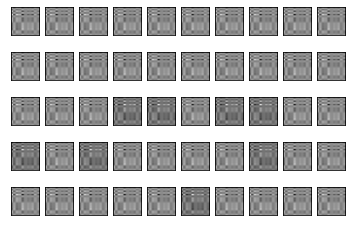

In [99]:
X_rec = tl.tucker_to_tensor((G_,factors))
plot_faces(X_rec, 5,10, False)

Dies sind die Inhalte der Faktormatrizen, welche sich nicht mer gross unterscheiden. Da sie die ähnliche Information enthalten (All haben einen Kopf, augen und Ohren). Im Gewichtungstensor stacken dann die Merkmale, wleche sich unterscheiden. 